### Module 4: Linear Regression with Feature Selection

In section 2 below, we will discuss feature selection.


ML Process:<P>
1. Obtain and load the data
2. **PERFORM FEATURE SELECTION**
3. Split the data into training & test datasets
4. Format the data for the algorithm
5. Create the model and train it
6. Use the test set to measure the model's performance
7.  Use the model to make new predictions

In [1]:
# Load libraries
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### 1. Obtain and load the data

In [2]:
# Load the Boston housing dataset.
data = datasets.load_boston() # loads Boston dataset from datasets library 
# The Target will be the median value "MEDV" in thousands of dollars
y = pd.DataFrame(data.target, columns=["MEDV"])
# Create a df with all possible featues
df = pd.DataFrame(data.data, columns=data.feature_names)
df.head(4)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94


### 2. Perform Feature Selection: 

Feature selection is one of the first and important steps while performing any machine learning task.<P>

By **feature**, I simply means a column. There are several synonymous terms used in ML that have a similar meaning:<P>

    - feature, attribute, predictor, independent variable, column, dimensions, "X"s<P>
    
The **target** variable on the other hand is known by dependent variable or "y"s.<P>

When we begin with any dataset, not necessarily every column (feature) is going to have an impact on the output variable. If we add these irrelevant features in the model, it will just make the model worse. By "worse", I mean more error or less accurate in prediction as measured by our metrics. This gives rise to the need of doing feature selection.<P>

Including feature selection methods as a preprocessing step in predictive modeling comes with several advantages. It can reduce model complexity, enhance learning efficiency, and can even increase predictive power by reducing noise.

Features pairs with **high linear correlation** are more linearly dependent and hence have almost simiar effect on the dependent variable. So, when two features have high correlation, we can drop one of the two features.<P>
    
In this section, we will perform one method of feature selection.

Ref:
https://towardsdatascience.com/feature-selection-correlation-and-p-value-da8921bfb3cf

In depth coverage of this topic:
https://machinelearningmastery.com/feature-selection-for-regression-data/

In [3]:
# Generate the corelation between all pairs of features
#      https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.corr.html
corr_df = df.corr() # Still returns a dataframe
# Show just the first 5 rows & cols
corr_df.iloc[:5,:5]

,CRIM,ZN,INDUS,CHAS,NOX
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000


In [4]:
# Look at corr values for just one features
# I think # of rooms are important. How are other columns correlated?
corr_df['RM']

CRIM      -0.219247
ZN         0.311991
INDUS     -0.391676
CHAS       0.091251
NOX       -0.302188
RM         1.000000
AGE       -0.240265
DIS        0.205246
RAD       -0.209847
TAX       -0.292048
PTRATIO   -0.355501
B          0.128069
LSTAT     -0.613808
Name: RM, dtype: float64

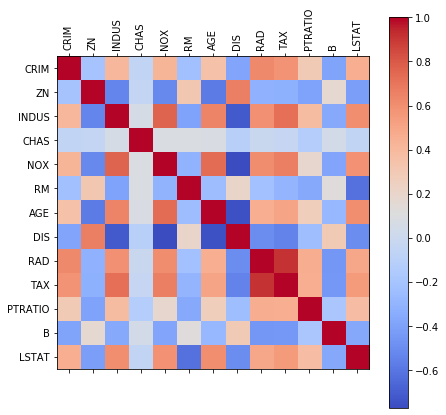

In [5]:
# Let's do a correlation plot
from matplotlib import cm # Colormap
f = plt.figure(figsize=(7, 7))
# Use the 'matrix-show' function
#     https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.matshow.html
plt.matshow(df.corr(), fignum=f.number, cmap="coolwarm")
# ============= Graph formatting details ===========
plt.xticks(range(df.select_dtypes(['number']).shape[1]),
           df.select_dtypes(['number']).columns, fontsize=10, rotation=90)
plt.yticks(range(df.select_dtypes(['number']).shape[1]),
           df.select_dtypes(['number']).columns, fontsize=10)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=10)
plt.show()

In [6]:
# Use the background_gradient function from pandas to generate similar plot with numbers: 
#    https://pandas.pydata.org/pandas-docs/version/0.17/generated/pandas.core.style.Styler.background_gradient.html
corr_df.style.background_gradient(cmap='coolwarm').set_precision(2)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
CRIM,1.00,-0.20,0.41,-0.06,0.42,-0.22,0.35,-0.38,0.63,0.58,0.29,-0.39,0.46
ZN,-0.20,1.00,-0.53,-0.04,-0.52,0.31,-0.57,0.66,-0.31,-0.31,-0.39,0.18,-0.41
INDUS,0.41,-0.53,1.00,0.06,0.76,-0.39,0.64,-0.71,0.60,0.72,0.38,-0.36,0.60
CHAS,-0.06,-0.04,0.06,1.00,0.09,0.09,0.09,-0.10,-0.01,-0.04,-0.12,0.05,-0.05
NOX,0.42,-0.52,0.76,0.09,1.00,-0.30,0.73,-0.77,0.61,0.67,0.19,-0.38,0.59
RM,-0.22,0.31,-0.39,0.09,-0.30,1.00,-0.24,0.21,-0.21,-0.29,-0.36,0.13,-0.61
AGE,0.35,-0.57,0.64,0.09,0.73,-0.24,1.00,-0.75,0.46,0.51,0.26,-0.27,0.60
DIS,-0.38,0.66,-0.71,-0.10,-0.77,0.21,-0.75,1.00,-0.49,-0.53,-0.23,0.29,-0.50
RAD,0.63,-0.31,0.60,-0.01,0.61,-0.21,0.46,-0.49,1.00,0.91,0.46,-0.44,0.49
TAX,0.58,-0.31,0.72,-0.04,0.67,-0.29,0.51,-0.53,0.91,1.00,0.46,-0.44,0.54


#### Result of my 'feature selection':

In [7]:
# After my "qualitative" evaluation, I've decided to go with:
X = df[['RM','DIS','CRIM','PTRATIO']]
X.head(2)

,RM,DIS,CRIM,PTRATIO
0,6.575,4.0900,0.00632,15.3
1,6.421,4.9671,0.02731,17.8


### 3. Split the data into training & test datasets

In [8]:
# Reserve 20% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)
# Verify the sizes of the split datasets
print('X_train:', X_train.shape)
print('y_train:', y_train.shape)
print('X_test:', X_test.shape)
print('y_test:', y_test.shape)

X_train: (404, 4)
y_train: (404, 1)
X_test: (102, 4)
y_test: (102, 1)


### 4. Format the data for the algorithm
Since the X data is already in a dataframe, we're good. Let' just verify it.

In [9]:
print(type(X_train))
print(type(X_test))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>


### 5. Create the model and train it

In [10]:
# Your code here:
# Create linear regression object
model = linear_model.LinearRegression()
#
# Train the model using the training sets
model.fit(X_train, y_train)
#
print('X columns:',list(X.columns))
print('The linear model corefficents are:',model.coef_)
print('Intercept:',model.intercept_)
#
# Let's discuss the magnitude and sign of the coefficients.

X columns: ['RM', 'DIS', 'CRIM', 'PTRATIO']
The linear model corefficents are: [[ 7.33723802 -0.02110182 -0.19253304 -1.0360805 ]]
Intercept: [-3.58975863]


### 6. Use the test set to measure the model's performance

In [11]:
# Make predictions from the test dataset
y_pred = model.predict(X_test)
# Calc performance
print("Coefficient of determination: %.2f" % r2_score(y_test, y_pred))
#
# Let's discuss how R^2 captures the amount of variation in the model vs. "other" variation.

Coefficient of determination: 0.69


### 7.  Use the model to make new predictions: "Inference"

In [12]:
# Let's define some new houses and see what value the model would predict
cols = list(X.columns)
h1 = [4,4,.01,20]
h2 = [9,2,.1,15]
h3 = [10,1,.025,30]
h4 = [7,.5,.0045,10]
new_houses_df = pd.DataFrame(data = [h1,h2,h3,h4], columns = cols)
new_houses_df
#
# Call the predict function from the model
new_medv = model.predict(new_houses_df) # Returns list of arrays
# Need to flatten this list of arrays to just a list of scalers so we can plot it
new_medv = new_medv.flatten().tolist()
new_medv # Predicted values

[4.95125079144616, 46.84271908953172, 38.674291342949296, 37.39868519153505]

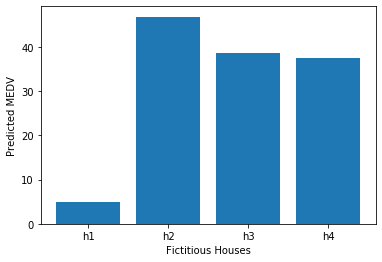

In [13]:
# Plot bar chart of the predicted values
x_bars = ['h1','h2','h3','h4']
plt.bar(x_bars, new_medv)
plt.xlabel("Fictitious Houses")
plt.ylabel("Predicted MEDV")
plt.show()